In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv("winequality-red.csv")

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
columns_name=df.columns

In [7]:
# checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# number of wines for each quality value
df["quality"].value_counts()


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

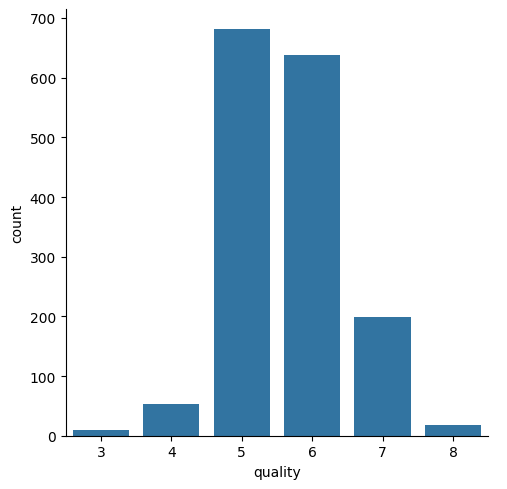

In [10]:
sns.catplot(x= "quality", data= df, kind= "count")

<Axes: >

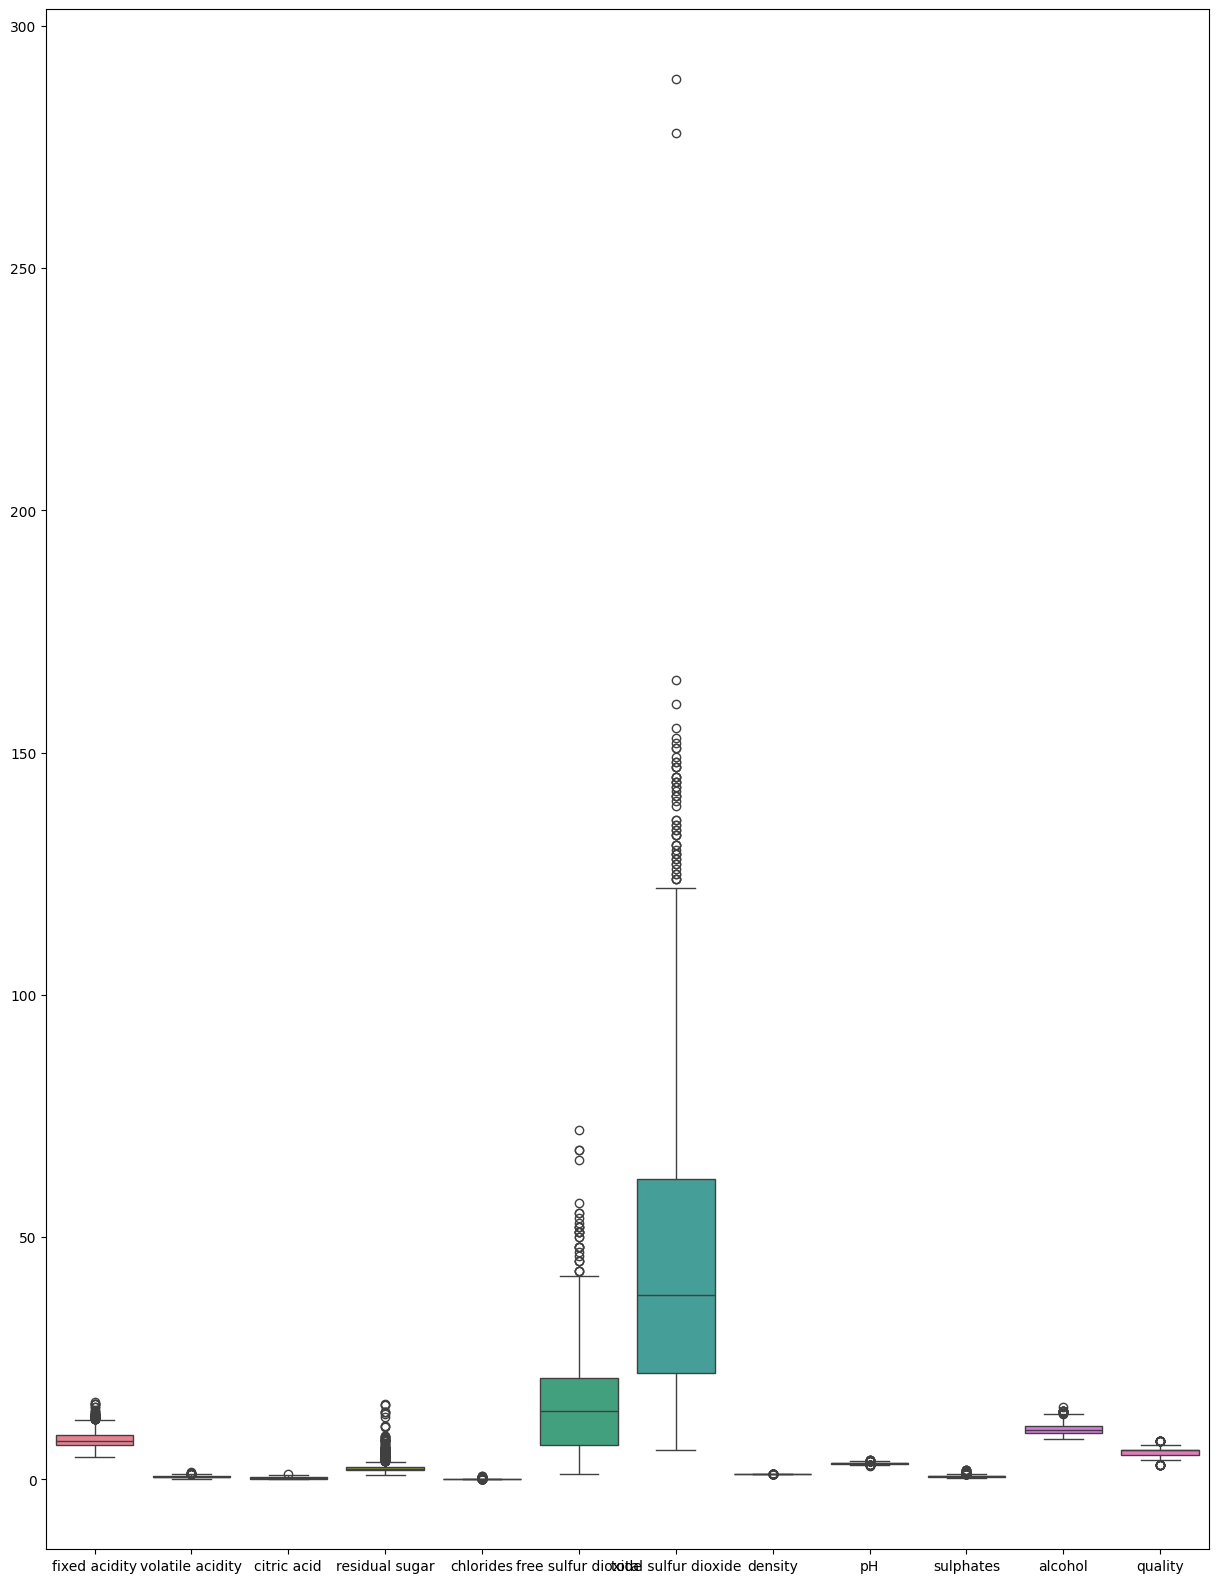

In [11]:
# checking outliers
plot = plt.figure(figsize=(15,20))
sns.boxplot(df)

In [12]:
# settings bonds
upper_bond= df.quantile(0.95)
lower_bond= df.quantile(0.05)

In [13]:
# removing outliers
df= np.where(df>=upper_bond, upper_bond, np.where(df<=lower_bond, lower_bond, df))
df=pd.DataFrame(df)

<Axes: >

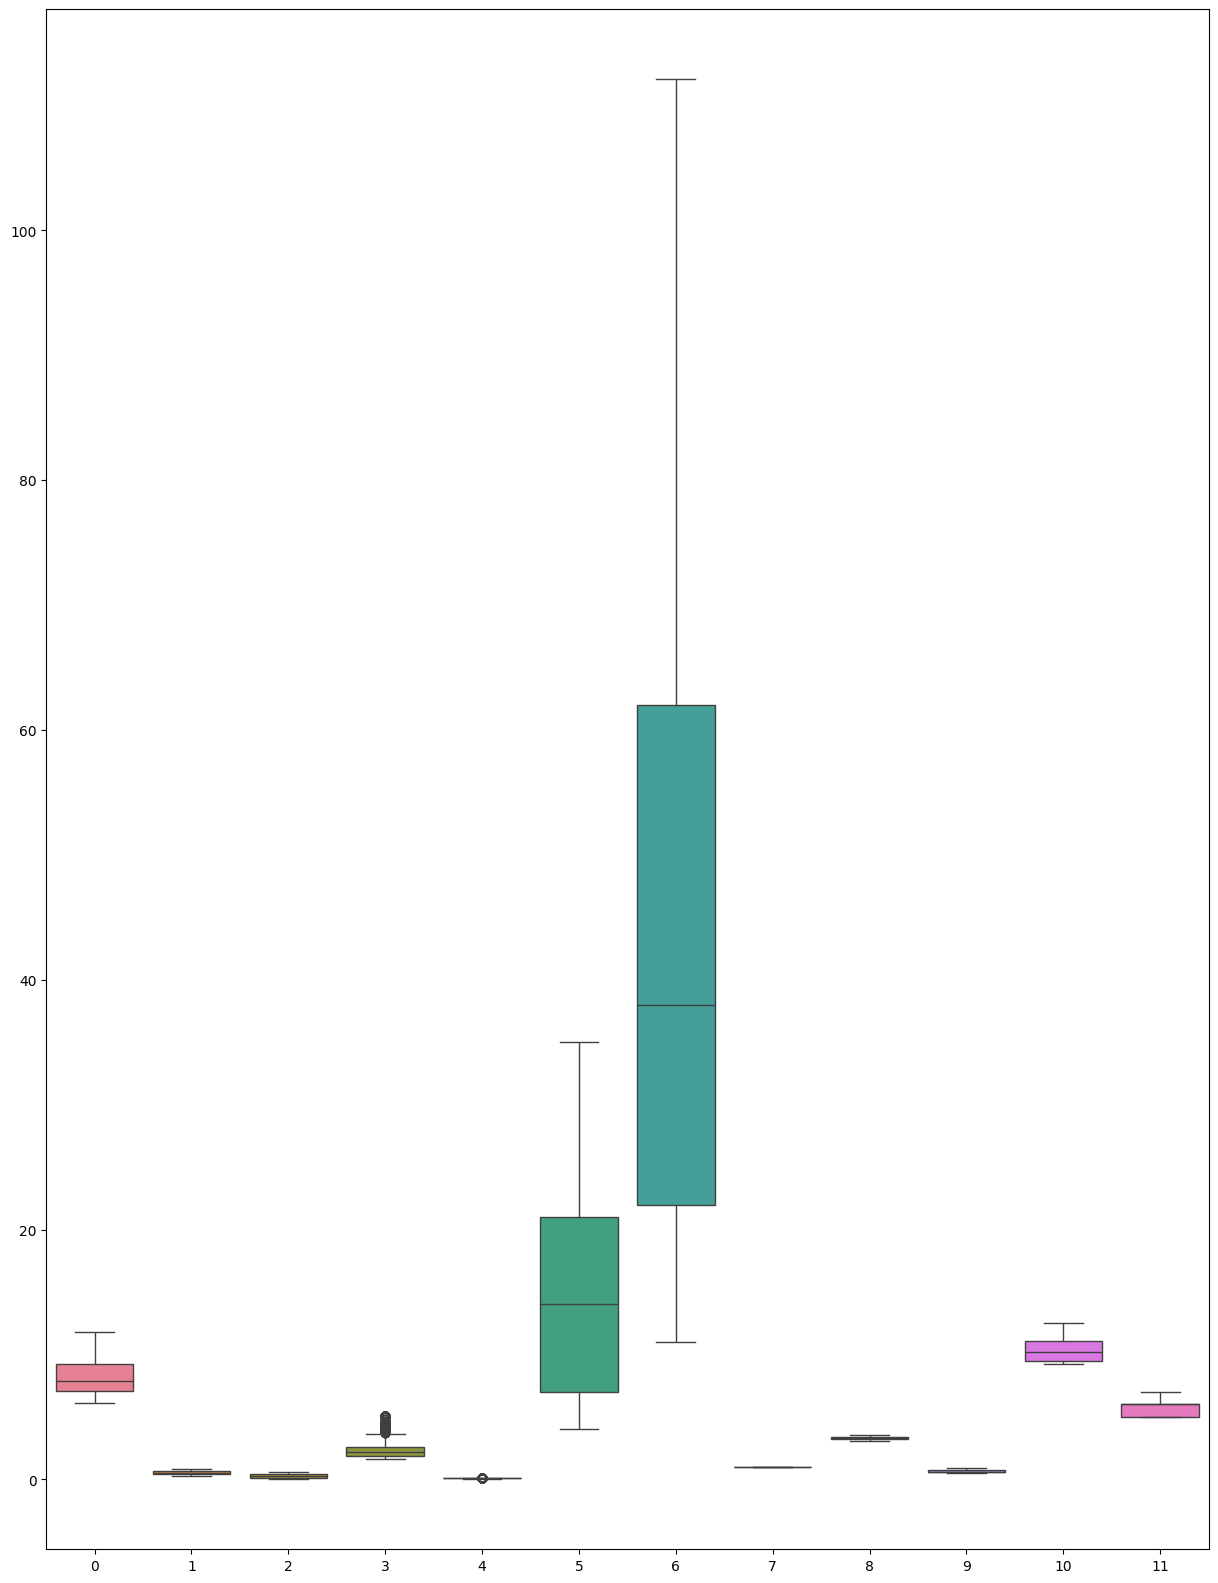

In [14]:
plot = plt.figure(figsize=(15,20))
sns.boxplot(df)

In [15]:
df.columns= columns=columns_name

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.84,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [17]:
# checking correlations
correlation=df.corr()

<Axes: >

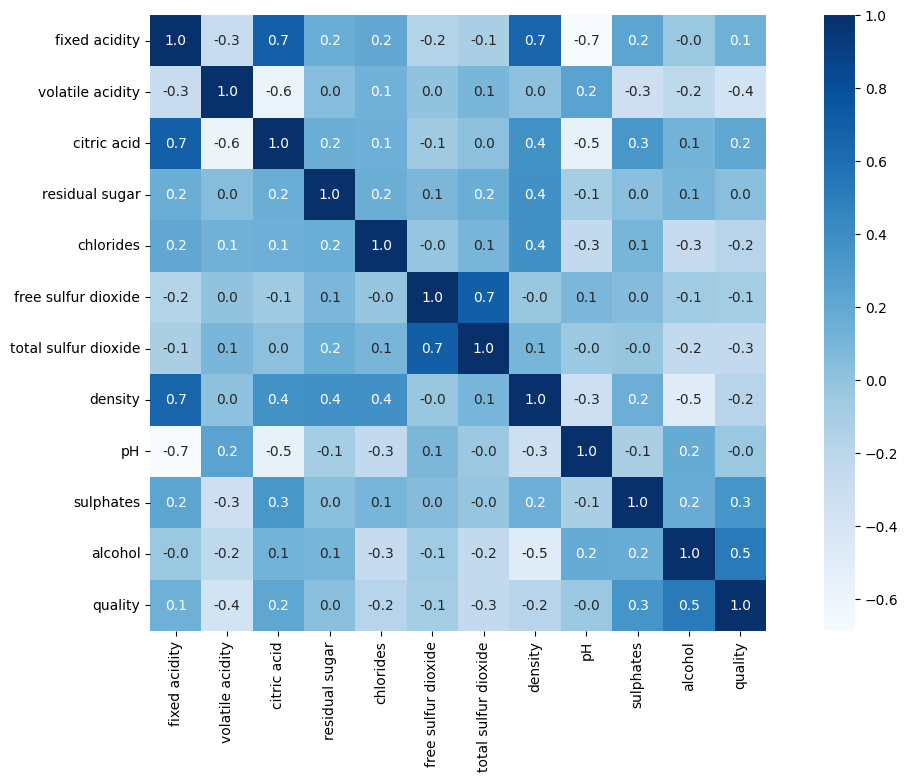

In [18]:
# plotting heatmap for checking correlation 
plot= plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap= "Blues", square=True, fmt=".1f")

In [19]:
# seperating input and output columns
X= df.drop("quality", axis=1)
Y= df["quality"].apply(lambda y_value: 1 if y_value>=6 else 0)  # converting data into good and bad quality labels  (0 for bad and 1 for good)

In [20]:
# splitting train and test data
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=3)

In [21]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred= clf.predict(X_test)

In [23]:
# checking accuracy for test data
accuracy_score(y_pred, y_test)

0.84375

## making predictions

In [24]:
input= (7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)

# converting into nparray
input_array= np.asarray(input)

# reshaping and predicting
input_array_reshape= input_array.reshape(1,-1)

output= clf.predict(input_array_reshape)

if output==0:
    print( "Quality of wine is not good")
else:
    print("Quality of wine is good")

Quality of wine is not good


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
input= (7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,)

# converting into nparray
input_array= np.asarray(input)

# reshaping and predicting
input_array_reshape= input_array.reshape(1,-1)

output= clf.predict(input_array_reshape)

if output==0:
    print( "Quality of wine is not good")
else:
    print("Quality of wine is good")

Quality of wine is good


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
